<a href="https://colab.research.google.com/github/yirouleh/cs167notes/blob/main/Notebook5_Leh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \#5: SVM, Perceptron, SGD, and PCA
**Due:** Tuesday 11/9, by 11:59pm

Name: Yi Rou Leh

**Exercises**: \\
Build a **default model** for each of the following and then build a model with **one parameter tuned** (no need to include a graph, just change one parameter that hopefully results in a better model):
1. Support Vector Machines
2. Perceptron
3. Stochastic Gradient Descent
4. Run a PCA on the best model
5. Answer the conclusion questions


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/CS167/datasets/breast-cancer-wisconsin-data.csv')
data.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#we need to drop the last column 'Unnamed: 32'
data.drop(labels='Unnamed: 32', axis=1, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


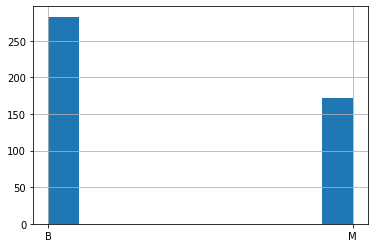

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


predictors = data.columns.drop('diagnosis')
target = "diagnosis"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_sln.hist()
#now you can use train_data, test_data, train_sln, and test_sln

## Exercises:
1. Support Vector Classifier: \\
  a. Default \\
  b. Tuned

In [ ]:
#Confusion Matrix
import seaborn as sns

flag = True
def print_cf_matrix(test_sln, predictor, flag):
  cf_matrix = confusion_matrix(test_sln, predictor,)
  if flag:
    sns.heatmap(cf_matrix, annot=True, xticklabels = ['p_benign', 'p_malignant'],
                yticklabels = ['t_benign', 't_malignant'])
    
  else:
    print(cf_matrix)

accuracy:  0.9824561403508771


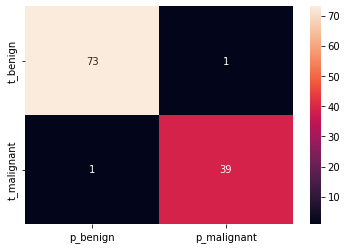

In [ ]:
#Default SVC

import numpy
from sklearn import metrics
from sklearn.svm import SVC

svc = SVC(random_state = 0)
svc.fit(train_data, train_sln)
predictions = svc.predict(test_data)

#Output
print("accuracy: ", metrics.accuracy_score(test_sln, predictions))
print_cf_matrix(test_sln, predictions, True)

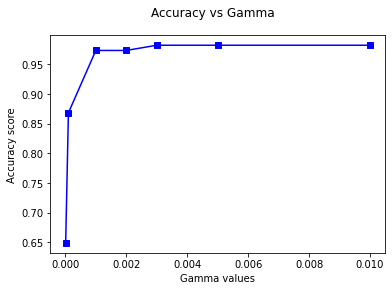

In [ ]:
#Run SVC over range of gamma
g_list = [0.00001, 0.0001, 0.001, 0.002, 0.003, 0.005, 0.01]
g_accuracies = []

for g in g_list:
  svc = SVC(random_state=0, gamma = g)
  svc.fit(train_data, train_sln)
  predictions = svc.predict(test_data)
  g_accuracies.append(metrics.accuracy_score(test_sln, predictions))

#Plot results
import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('Accuracy vs Gamma',fontsize=12)
plt.xlabel('Gamma values')
plt.ylabel('Accuracy score')
plt.plot(g_list,g_accuracies,'bs-')
plt.show()

SVC accuracy:  0.9824561403508771


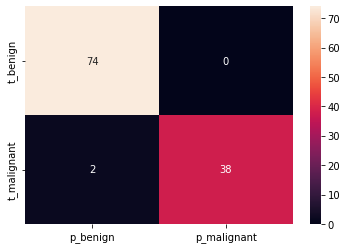

In [ ]:
#Tuned SVC:
svc = SVC(random_state = 0, gamma = 0.01)
svc.fit(train_data, train_sln)
predictions = svc.predict(test_data)

#Output accuracy
print("SVC accuracy: ", metrics.accuracy_score(test_sln, predictions))
print_cf_matrix(test_sln, predictions, True)

2. Perceptron: \\
  a. Default \\
  b. Tuned

SVC accuracy:  0.9824561403508771


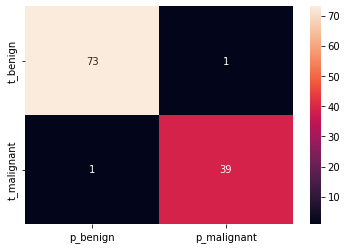

In [ ]:
#Default Perceptron
from sklearn.linear_model import Perceptron

#Ignore warnings, we accept the warnings regarding default values of Perceptron
import warnings
warnings.filterwarnings("ignore")

#Load up scikit-learn perceptron
perc = Perceptron(random_state = 0)
perc.fit(train_data, train_sln)
perc.predictions = predict(test_data)

#Output accuracy
print("SVC accuracy: ", metrics.accuracy_score(test_sln, predictions))
print_cf_matrix(test_sln, perc.predictions, flag)
#0.982456

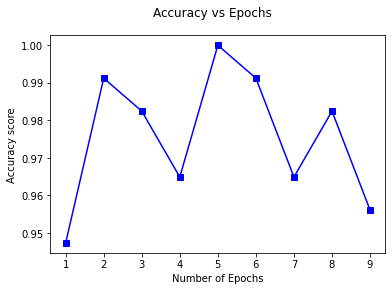

4


In [ ]:
#Run perceptron over range of epochs to tune it
epoch_list = range(1, 10, 1)
epoch_accuracies = []

for epoch in epoch_list:
  perc = Perceptron (random_state = 0, max_iter = epoch)
  perc.fit(train_data, train_sln)
  predictions = perc.predict(test_data)
  epoch_accuracies.append(metrics.accuracy_score(test_sln, predictions))

#Plot results
%matplotlib inline
plt.suptitle('Accuracy vs Epochs',fontsize=12)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy score')
plt.plot(epoch_list,epoch_accuracies,'bs-')
plt.show()

maxE = max(epoch_accuracies)
print(epoch_accuracies.index(maxE))

Accuracy:  1.0


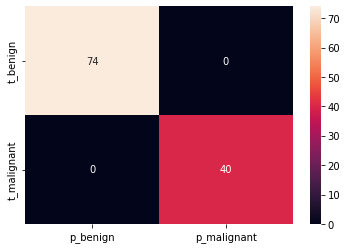

In [ ]:
#Tuned Perceptron
perc = Perceptron(random_state = 0, max_iter = 5)
perc.fit(train_data, train_sln)
predictions = perc.predict(test_data)

#Output accuracy
print("Accuracy: ", metrics. accuracy_score(test_sln, predictions))
print_cf_matrix(test_sln, predictions, True)

3. Stochastic Gradient Descent: \\
  a. Default \\
  b. Tuned

accuracy:  0.9736842105263158


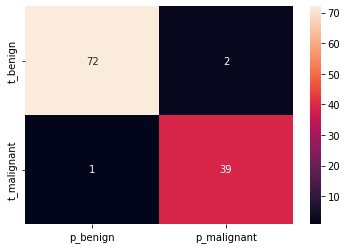

In [ ]:
#Default SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state = 0)
sgd.fit(train_data, train_sln)
predictions = sgd.predict(test_data)

#Output accuracy
print("accuracy: ", metrics.accuracy_score(test_sln, predictions))
print_cf_matrix(test_sln, predictions, True)

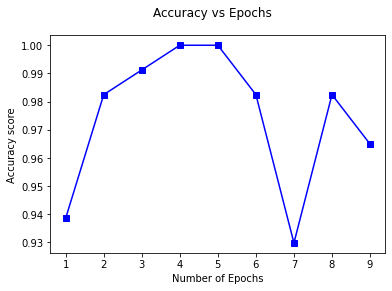

3


In [ ]:
#Run SGD over range of epochs to tune it
epoch_list = range(1, 10, 1)
epoch_accuracies = []

for epoch in epoch_list:
  sgd = SGDClassifier (random_state = 0, max_iter = epoch)
  sgd.fit(train_data, train_sln)
  predictions = sgd.predict(test_data)
  epoch_accuracies.append(metrics.accuracy_score(test_sln, predictions))

#Plot results
%matplotlib inline
plt.suptitle('Accuracy vs Epochs',fontsize=12)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy score')
plt.plot(epoch_list,epoch_accuracies,'bs-')
plt.show()

maxE = max(epoch_accuracies)
print(epoch_accuracies.index(maxE))

Accuracy:  1.0


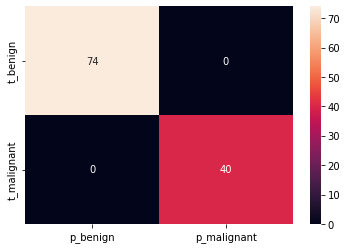

In [ ]:
#Tuned SGD
sgd = SGDClassifier(random_state = 0, max_iter = 4)
sgd.fit(train_data, train_sln)
predictions = sgd.predict(test_data)

#Output accuracy
print("Accuracy: ", metrics. accuracy_score(test_sln, predictions))
print_cf_matrix(test_sln, predictions, True)

3. Now take the model that performed the best above and run a **principal component analysis** on it. 

accuracy: 0.9824561403508771


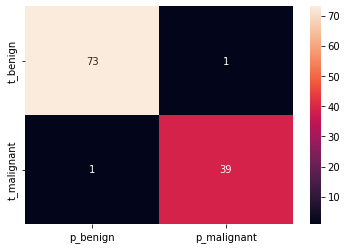

In [ ]:
#PCA on best model
from sklearn.decomposition import PCA
extractor = PCA(n_components = 10, whiten = True)
extractor.fit(train_data)
train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)

#Run SGD with transformed data
sgd = SGDClassifier(random_state = 0, max_iter = 4)
sgd.fit(train_transformed, train_sln)
predictions = sgd.predict(test_transformed)

#Output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
print_cf_matrix(test_sln, predictions, True)


## Conclusions:
a. Which model performed the best? Why do you think this model performed the best? \\
b. What effect did the principal component analysis have on the accuracy of your best model? Why do you think this is the case?

SVC Accuracy: 0.982456\
Perceptron Accuracy: 1.0\
SGD Accuracy: 1.0\
After PCA: 0.982456\
a. The SGD (stochastic gradient descent) model performed the best among the three. This is becasue the dataset contains a lot of predictor variables and the model works well with data that contains noise. However, the perceptron model also resulted in an accuracy of 1.0, which is also the best.

b. The principal component analysis decreased the accuracy of the model from 100% to 98.25%. This is probably because using PCA had caused the lost of some spatial information which is important for classification modelling, hence resulting in decreasing accuracy.